# Linear Tree Regressor

Let's take a quick look at how these models work and compare them with decision tree regressors

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from lineartree import LinearTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

We are going to simulate a time series for testing this model

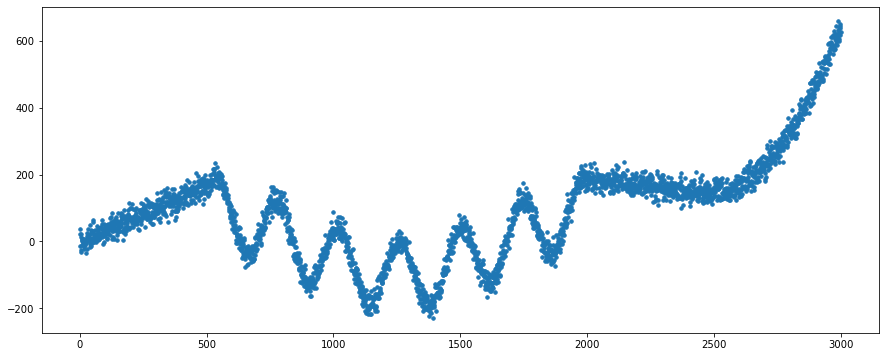

In [31]:
x1 = np.arange(500)
x2 = np.arange(500,2000)
x3 = np.arange(2000, 2500)
x4 = np.arange(2500, 3000)

f1 = lambda x: x/3
f2 = lambda x: 100*(np.sin(2*np.pi*x/240)+np.sin(2*np.pi*x/(240*7)))  
f3 = lambda x: -x/10 + 390
f4 = lambda x: (x-2500)**2/500 + 150

y = np.zeros(3000)
y[:500] = f1(x1)
y[500:2000] = f2(x2)
y[2000:2500] = f3(x3)
y[2500:3000] = f4(x4)
y += np.random.normal(0, 20, y.shape[0])

X = np.arange(3000).reshape(-1,1)

plt.figure(figsize=(15, 6))
plt.scatter(np.arange(3000), y, s=12)

## Plots

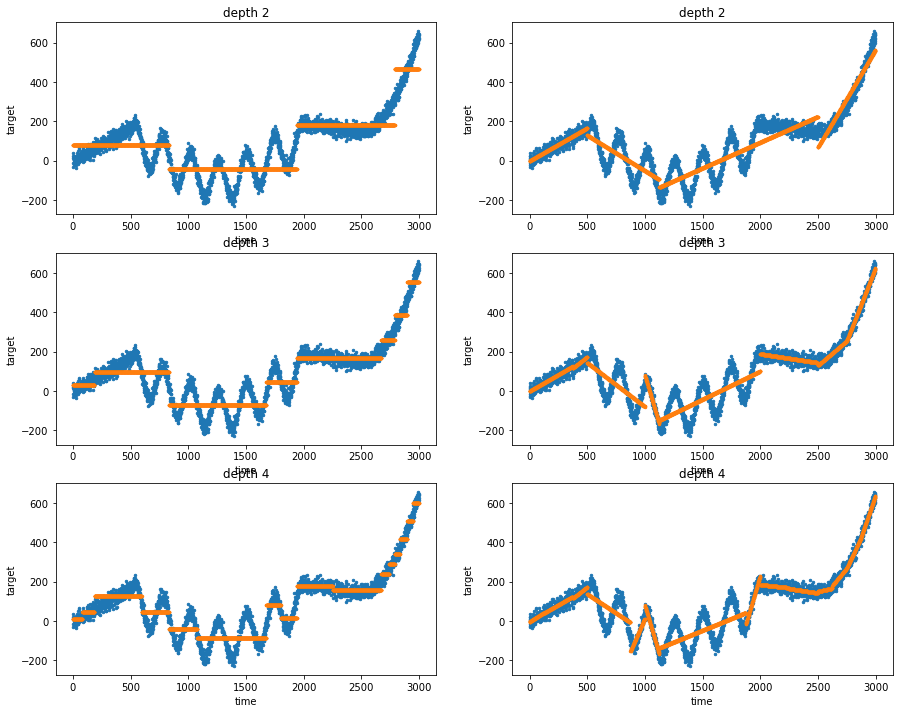

In [33]:
plt.figure(figsize=(15,12))

it = 1
depth = 2

while it < 7:
    
    if it%2 == 0:
        tree = LinearTreeRegressor(
            base_estimator = LinearRegression(),
            min_samples_leaf = 100,
            max_depth = depth
        ).fit(X, y)
        
    else:
        tree = DecisionTreeRegressor(
            max_depth = depth
        ).fit(X, y)
        
    plt.subplot(3,2, it)
    plt.scatter(X, y, s=6)
    plt.scatter(X, tree.predict(X), s=6)
    plt.xlabel('time'); plt.ylabel('target')
    plt.title("depth {}".format(depth))
    
    it += 1
    
    if it == 3:
        depth = 3
    if it == 5:
        depth = 4

As expected, we see that when data is not very linear or concentrated the linear trees are able to extrapolate quite better the predictions than the traditional trees. Traditional trees spend many leaves to cover a small portion of the data, while linear trees with the prediction of a single leaf can cover what would have occupied several leaves of the other trees.

In terms of the models at the leaves, the regression linear trees work as classification linear trees do.